In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', encoding='windows-1254')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Sample - Superstore.csv', encoding='windows-1254')
#df=pd.read_csv('/content/gdrive/MyDrive/Retail 6/Sample - Superstore.csv', encoding='windows-1254')

## **Data Understanding**

In [3]:
df.shape
# shape() : Melihat jumlah baris dan kolom.

(9994, 21)

dataset terdiri dari 9994 baris dan 21 kolom

In [4]:
df.info()
# info() : Nomor index beserta tipe datanya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

df.dtype digunakan untuk mengecek tipe data variabel. pada variabel order date dan ship date bertipe data object. Seharusnya variabel order date dan ship date dapat menggunakan tipe data datetime.

In [5]:
# memperbaiki tipe data waktu
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

df.dtype digunakan untuk mengecek tipe data variabel. dari hasil pengecekan diatas didapat 3 tipe data integer, 3 tipe data float, 2 tipe data datetime dan 13 tipe data object.

> tipe data Integer: 
- Row ID
- Postal Code
- Quantity

> tipe data Float: 
- Sales
- Discount
- Profit

> tipe data Datetime: 
- Order Date
- Ship Date

> tipe data Object:
- Order ID
- Ship Mode
- Customer ID
- Customer Name
- Segment
- Country
- City
- State
- Region
- Product ID
- Category
- Sub-Category
- Product Name





In [ ]:
df.describe()
# describe() : Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## **Pre-processing**

In [6]:
# mengganti spasi(" ") menjadi underscore ("_")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
# Data Missing Check
df.isnull().sum()
# isnull() : Mengecek variabel yang memiliki null/kosong.

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

Tidak ada missing value

In [8]:
# Data Duplicated
df.duplicated().sum()

0

Tidak ada duplikat data

In [9]:
num = ['row_id', 'postal_code', 'sales', 'quantity', 'discount', 'profit']
cat = ['order_id', 'order_date', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'region', 'product_id', 'category', 'sub-category', 'product_name']

kita akan membagi kolom numerical dan categorical.
> Pada kolom numberical terdapat variabel : Row ID, Postal Code, Sales, Quantity, Discount, dan Profit.

> Pada kolom categorical terdapat variabel : Order ID, Order Date, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Region, Product ID, Category, Sub-Category dan Product Name.

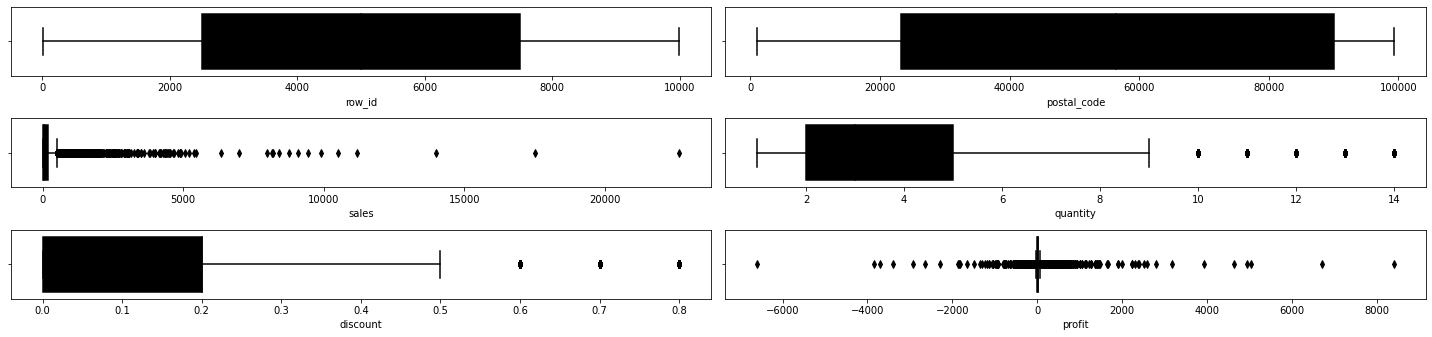

In [10]:
# Outlier
plt.figure(figsize=(20, 9))
for i in range(0, len(num)):
    plt.subplot(6, len(num)/3, i+1)
    sns.boxplot(df[num[i]], color='black')
    plt.tight_layout()

Variabel yang memiliki outlier yaitu Sales, Quantity, Discount dan Profit.
data ini memiliki banyak outlier dapat mempengaruhi 
data outlier ini tidak dihapus karena data tersebut akan digunakan untuk modeling data. karena data time series membutuhkan data yang lengkap setiap waktunya dan pergerakkan outlier sangt mempengaruhi. 

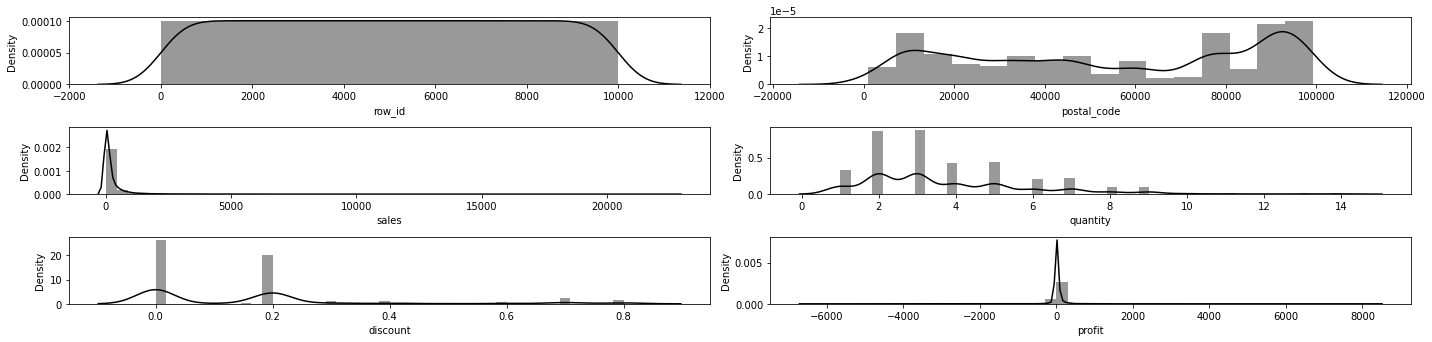

In [11]:
plt.figure(figsize=(20, 9))
for i in range(0, len(num)):
    plt.subplot(6, len(num)/3, i+1)
    sns.distplot(df[num[i]], color='black')
    plt.tight_layout()

Distribusi normal pada hasil diatas yaitu: row_id

In [12]:
print('Skew: {}'.format(df[num].skew()))

Skew: row_id          0.000000
postal_code    -0.128526
sales          12.972752
quantity        1.278545
discount        1.684295
profit          7.561432
dtype: float64


Skewness merupakan ukuran ketidaksimetrisan dalam penyebaran data. Skewness dapat bernilai positif, negatif, dan nol.
> Skewness nol: Row ID
>> Skewness nol berarti nilai terdistribusi secara simetris, dengan jarak antara ekor distribusi sebelah kanan dan kiri sama besar

> Skewness positif: Sales, Quantity, Discount dan Profit
>> Skewness positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Artinya mayoritas nilai distribusi berada di kiri kurva.

> Skewness neganif: Postal Code
>> Skewness negatif berarti ekor distribusi berada di sebelah kiri. Artinya mayoritas nilai distribusi berada di kanan kurva. akan tetapi pada variabel Postal Code index skewness -0.128526 sehingga bentuk kurva hampir simetris.



# Exploratory Data Analysis (EDA)

**Deskripsi :**

Pada proses Exploratory Data Analysis (EDA) ini pertama-tama ditentukan dulu tujuan atau insight apa yang ingin kita tampilkan/peroleh. Tujuannya adalah untuk lebih memahami produk, wilayah, kategori, dan segmen pelanggan mana yang harus mereka targetkan atau hindari untuk meningkatkan produk.

**Berikut adalah beberapa pertanyaan dari sudut pandang bisnis :**

Dari segi produk
- Berapa total penjualan, kuantitas terjual, dan profit yang dihasilkan Superstore ?
- Pelanggan mana saja yang paling banyak berbelanja ?
- Produk apa saja yang menghasilkan keuntungan paling maksimal dan minimum ?
- Produk apa saja yang paling disukai oleh pelanggan ?
- Shipping mode mana yang lebih disukai oleh pelanggan ?

Dari segi kategori dan sub-kategori
- Kategori dan sub-kategori apa saja yang paling laris dan paling menguntungkan (dari segi sales, quantity, profit) ?

Dari segi wilayah
- Negara bagian mana yang menghasilkan penjualan tertinggi atau jumlah penjualan tertinggi ?
- Negara bagian mana yang paling untung dan yang paling rugi ?
- Negara bagian mana yang paling banyak item produknya terjual ?
- Bagaimana rata-rata pemberian diskon pada setiap negara bagian ?
- Produk apa saja yang banyak dibeli oleh negara bagian yang menghasilkan keuntungan paling besar dan yang menanggung kerugian?

Dagi segi segment pelanggan
- Segment pelanggan apa yang perlu dipertahankan untuk mendorong keuntungan lebih tinggi ?
- Shipping mode mana yang lebih disukai oleh pelanggan ?

## Intro

**Deskripsi Statistik**

In [ ]:
#Karena postal code tidak memiliki informasi yang diperlukan, maka boleh didrop
col_drop=['postal_code','row_id']
df1=df.drop(columns=col_drop,axis=1)

df1.describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# total Sales
print ('Total Sales')
round(sum(df['sales']), 2)

Total Sales


2297200.86

In [ ]:
# Quantity sold
print ('Quantity sold')
sum(df['quantity'])

Quantity sold


37873

In [ ]:
# Total Keuntungan/profit
print ('Total Profit')
round(sum(df['profit']), 2)

Total Profit


286397.02

`Berdasarkan tabel deskripsi diatas, diperoleh beberapa informasi :`

- Total penjualan adalah `$2297200.86` dengan rata-rata penjualannya `$229.85` untuk setiap transaksi.
Nilainya berkisarnya dari `$0.444` dan maksimumnya adalah `$22638.48` untuk satu transaksi. 

- Total kuantitas produk yang terjual adalah 37.873 produk, dengan rata-rata 4 produk terjual untuk satu transaksi per individu. Kisaran produk yang dijual mulai dari 1 hingga 14 item. 

- Diskon rata-rata produk adalah 16% untuk setiap transaksi. Penjualan ini berkisar dari tidak ada diskon hingga diskon tertinggi 80% untuk transaksi per individual. Diskon yang lebih tinggi mungkin berasal dari produk-produk lama yang tidak terjual atau acara-acara besar.

- Sehingga, superstore menghasilkan total keuntungan `$286397.02` dengan rata-rata `$28.66` untuk setiap transaksi. Namun, nilai profit ini berkisar dari kerugian `$6599.978` hingga keuntungan `$8399.976` untuk satu transaksi.

**Jumlah kategori dari tiap kolom**

In [ ]:
category = []
print('Jumlah kategori dari tiap kolom')
for col in df.columns:
    cat_num = df.loc[:, col].drop_duplicates().count()
    print(f'{col} : {cat_num}')
    if cat_num < 30 and cat_num != 1:
        category.append(col)

Jumlah kategori dari tiap kolom
row_id : 9994
order_id : 5009
order_date : 1237
ship_date : 1334
ship_mode : 4
customer_id : 793
customer_name : 793
segment : 3
country : 1
city : 531
state : 49
postal_code : 631
region : 4
product_id : 1862
category : 3
sub-category : 17
product_name : 1850
sales : 5825
quantity : 14
discount : 12
profit : 7287


Berdasarkan hasil diatas, dapat diketahui bahwa ada 1850 jenis nama produk, 3 kategori, 17 sub-kategori, 3 segment dengan 59 state dari 4 region yang terdiri dari 531 kota dan berbagai kolom lainnya. 

**Korelasi**

In [ ]:
#korelasi antar variabel
corr = df1.corr()
corr

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


Korelasi adalah membandingkan/menggambarkan hubungan linier dan hubungan antara pasangan variabel, melalui jenis korelasi dan kekuatannya. 
Korelasi positif artinya bahwa kedua variabel akan mengubah nilainya dalam arah yang sama, sedangkan korelasi negatif menunjukkan bahwa keduanya akan berubah dalam arah yang berlawanan. Semakin besar kekuatan korelasi artinya semakin kuat koneksi dan hubungannya.

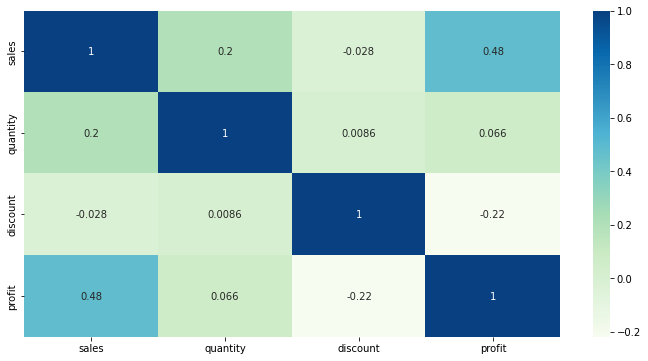

In [ ]:
#Visualisasi
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='GnBu')

Dari heatmap diatas dapat dilihat bahwa 
- Sales dan profit memiliki korelasi linier positif sebesar 48% yang menunjukkan bahwa bisnis cukup baik. 
- Diskon dan profit memiliki korelasi linier negatif sebesar 22% yang menunjukkan bahwa diskon yang diberikan oleh perusahaan untuk meningkatkan keuntungan, menyebabkan dampak negatif pada keuntungan perusahaan. Hal ini karena potongan diskon akan mengurangi profit secara keseluruhan (ada kemungkinan karena kualitas produk yang buruk, kurangnya kepercayaan konsumen terhadap barang diskon dan berbagai macam kemungkinan lainnya). 
- Kuantitas dan profit memiliki korelasi linier positif yang kecil sebesar 0.86%, angka ini mengartikan bahwa kuantitas tidak terlalu memberikan efek/pengaruh kepada profit (dapat dipengaruhi oleh stategi promosi yang kurang menguntungkan, misal beli satu gratis satu). Akibatnya keuntungan rata-rata lebih rendah.
- Diskon dan sales memiliki korelasi linear negatif yang kecil. Hal ini menunjukkan bahwa stategi bisnis dengan menggunakan diskon kurang baik dilaksanakan secara terus menerus. Ini akan memberikan kurangnya rasa kepercayaan pelanggan terhadap produk yang didiskon (apakah produk cacat atau kualitas bernilai rendah). Sehingga perusahaan harus mencari stategi bisnis lain.

## Analisis berdasarkan produk

### Pelanggan mana saja yang paling banyak berbelanja ?

Pertama akan dilihat pelanggan mana saja yang paling banyak berbelanja dari data. Pelanggan ini adalah pelanggan yang berharga untuk perusahaan karena membeli diatas rata-rata pelanggan lainnya.

In [ ]:
list_customer = pd.DataFrame(df.groupby(['customer_name','sub-category'])[['quantity','sales']].sum()).sort_values("sales", ascending=False)
print('Most valuable customer:\n',list_customer[:10])

Most valuable customer:
                                  quantity      sales
customer_name      sub-category                     
Sean Miller        Machines            10  23459.780
Tamara Chand       Copiers              5  17499.950
Raymond Buch       Copiers              4  13999.960
Sanjit Chand       Binders             22  11468.166
Tom Ashbrook       Copiers              4  11199.968
Christopher Conant Copiers              9  11199.936
Adrian Barton      Binders             32  11068.910
Hunter Lopez       Copiers              3  10499.970
Bill Shonely       Machines             7   9099.930
Sanjit Engle       Machines             5   8749.950


> Informasi diatas menunjukkan daftar nama pelanggan yang berbelanja diatas rata-rata. Nama-nama tersebut nantinya dapat dijadikan sebagai bahan pertimbangan perusahaan dalam memberikan bonus diskon, voucher atau pelayanan khusus lainnya, sehingga dapat menciptakan hubungan yang kuat, langgeng dan menguntungkan antar kedua belah pihak. Salah satu customer dengan pembelian terbanyak adalah Sean Miller dan Tamara Chand.

### List produk yang menghasilkan keuntungan paling maksimal dan minimum

In [ ]:
df_product = pd.DataFrame(df.groupby(['product_name','sub-category'])[['profit','sales']].sum()).sort_values("profit", ascending=False)
print('Product with maximum profit:\n',df_product[:10])
print('\n','='*100, '\n')
print('Product with minimum profit:\n',df_product[-10:])

Product with maximum profit:
                                                                      profit  \
product_name                                       sub-category               
Canon imageCLASS 2200 Advanced Copier              Copiers       25199.9280   
Fellowes PB500 Electric Punch Plastic Comb Bind... Binders        7753.0390   
Hewlett Packard LaserJet 3310 Copier               Copiers        6983.8836   
Canon PC1060 Personal Laser Copier                 Copiers        4570.9347   
HP Designjet T520 Inkjet Large Format Printer -... Machines       4094.9766   
Ativa V4110MDD Micro-Cut Shredder                  Machines       3772.9461   
3D Systems Cube Printer, 2nd Generation, Magenta   Machines       3717.9714   
Plantronics Savi W720 Multi-Device Wireless Hea... Accessories    3696.2820   
Ibico EPK-21 Electric Binding System               Binders        3345.2823   
Zebra ZM400 Thermal Label Printer                  Machines       3343.5360   

                     

> - Dapat dilihat bahwa mesin fotokopi dengan merek Canon imageCLASS 2200 Advanced Copier menghasilkan profit paling maksimal yaitu `$25199.928` dengan total penjualan sebesar `$61599.824` 
- Kategori mesin seperti Cubify CubeX 3D Printer Triple Head Print, Lexmark MX611dhe Monochrome Laser Printer, Cubify CubeX 3D Printer Double Head Print adalah produk yang paling merugi. Sehingga perusahaan dapat mempertimbangkan untuk mengeluarkan produk ini dari penjualan.

### List produk yang paling banyak dibeli oleh pelanggan

In [ ]:
list_product = pd.DataFrame(df.groupby(['product_name','category'])[['quantity']].sum()).sort_values("quantity", ascending=False)
print('Product with maximum number item sold:\n',list_product[:10])
print('\n','='*100, '\n')
print('Product with minimum number item sold:\n',list_product[-10:])

Product with maximum number item sold:
                                                                     quantity
product_name                                       category                 
Staples                                            Office Supplies       215
Staple envelope                                    Office Supplies       170
Easy-staple paper                                  Office Supplies       150
Staples in misc. colors                            Office Supplies        86
KI Adjustable-Height Table                         Furniture              74
Avery Non-Stick Binders                            Office Supplies        71
Storex Dura Pro Binders                            Office Supplies        71
GBC Premium Transparent Covers with Diagonal Li... Office Supplies        67
Situations Contoured Folding Chairs, 4/Set         Furniture              64
Staple-based wall hangings                         Furniture              62


Product with minimum number item s

> List produk yang paling banyak dibeli adalah alat-alat kantor seperti staples, kertas, surat dan lain-lain. Selain itu, kategori furniture seperti KI Adjustable-Height Table juga termasuk yang paling banyak dibeli.

## Analisis berdasarkan kategori & sub - kategori

### Kategori produk yang paling laris dan paling menguntungkan 

In [ ]:
#Jumlah per kategory berdasarkan quantity, sales, profit. Lalu diurutkan berdasarkan jumlah sales
df_category = pd.DataFrame(df.groupby(['category'])[['quantity','sales','profit']].sum()).sort_values("sales", ascending=False) 
df_category

,quantity,sales,profit
category,,,
Technology,6939,836154.0330,145454.9481
Furniture,8028,741999.7953,18451.2728
Office Supplies,22906,719047.0320,122490.8008


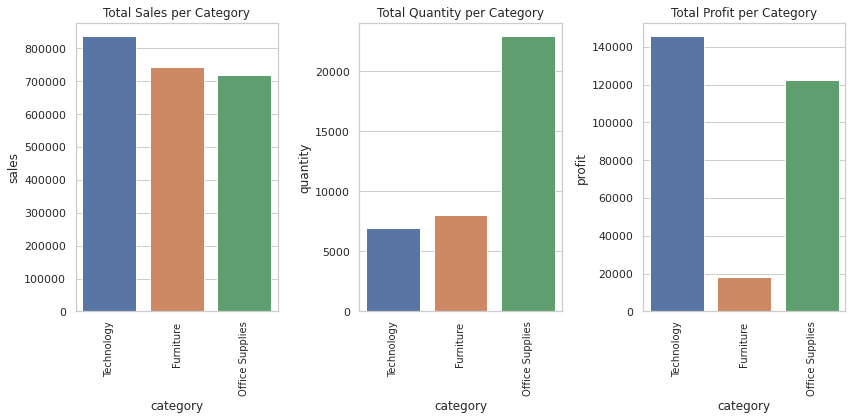

In [ ]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

# Plot barplots
#Sales
category_1 = sns.barplot(x = df_category.index, y = df_category.sales, ax=axis[0])
category_1.set(title = 'Total Sales per Category')
plt.setp(category_1.get_xticklabels(), rotation = 'vertical', size = 10)

#Quantity
category_2 = sns.barplot(x = df_category.index, y = df_category.quantity, ax=axis[1])
category_2.set(title = 'Total Quantity per Category')
plt.setp(category_2.get_xticklabels(), rotation = 'vertical', size = 10)

#Profit
category_3 = sns.barplot(x = df_category.index, y = df_category.profit, ax=axis[2])
category_3.set(title = 'Total Profit per Category')
plt.setp(category_3.get_xticklabels(), rotation = 'vertical', size = 10)

# Set jarak antar grafik
figure.tight_layout()

> Berdasarkan grafik diatas, dapat diperoleh beberapa informasi sebagai berikut :

- Kategori teknologi merupakan produk yang paling laris dan paling menguntungkan. Hal ini dapat dilihat dari besarnya total penjualan dan profit yang diperoleh.
- Kategori furniture merupakan produk yang paling tidak menguntungkan, karena profit yang dihasilkan sangat rendah dan kuantitas produk yang dijual juga sedikit. 
- Kategori perlengkapan kantor merupakan produk yang paling laris dari segi kuantitas serta profit yang diperoleh juga lumayan tinggi yaitu sebesar `$122490`. 

### Sub-Category produk yang paling laris dan paling menguntungkan 

In [ ]:
#Jumlah per sub-kategory berdasarkan quantity, sales, profit. Lalu diurutkan berdasarkan jumlah sales
subcategory_sales = pd.DataFrame(df.groupby(['sub-category'])[['quantity','sales','profit']].sum()).sort_values("sales", ascending=False)
print('Sub-Category with maximum number of item sold:\n',subcategory_sales[:5])
print('\n','='*50, '\n')
print('Sub-Category with minimum number of item sold:\n',subcategory_sales[-5:])
#df_subcategory

Sub-Category with maximum number of item sold:
               quantity       sales      profit
sub-category                                  
Phones            3289  330007.054  44515.7306
Chairs            2356  328449.103  26590.1663
Storage           3158  223843.608  21278.8264
Tables            1241  206965.532 -17725.4811
Binders           5974  203412.733  30221.7633


Sub-Category with minimum number of item sold:
               quantity      sales     profit
sub-category                                
Supplies           647  46673.538 -1189.0995
Art               3000  27118.792  6527.7870
Envelopes          906  16476.402  6964.1767
Labels            1400  12486.312  5546.2540
Fasteners          914   3024.280   949.5182


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

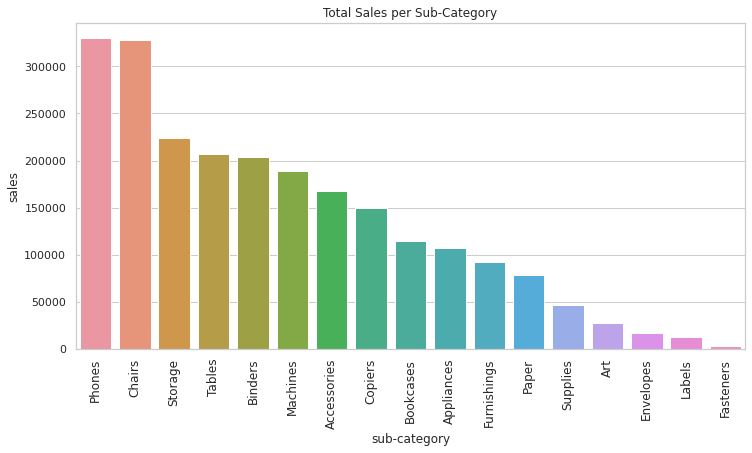

In [ ]:
#visualisasi
plt.figure(figsize=(12, 6))
subcategory = sns.barplot(x = subcategory_sales.index, y = subcategory_sales.sales)
subcategory.set(title = 'Total Sales per Sub-Category')
plt.xticks(fontsize=12, rotation=90)

> -  Ternyata lima sub-kategori yang paling laris terjual adalah phones, chairs, storage, tables dan binders.
- Serta lima sub-kategori yang paling minimum terjual adalah supplies, art, envelopes, labels dan fasteners.

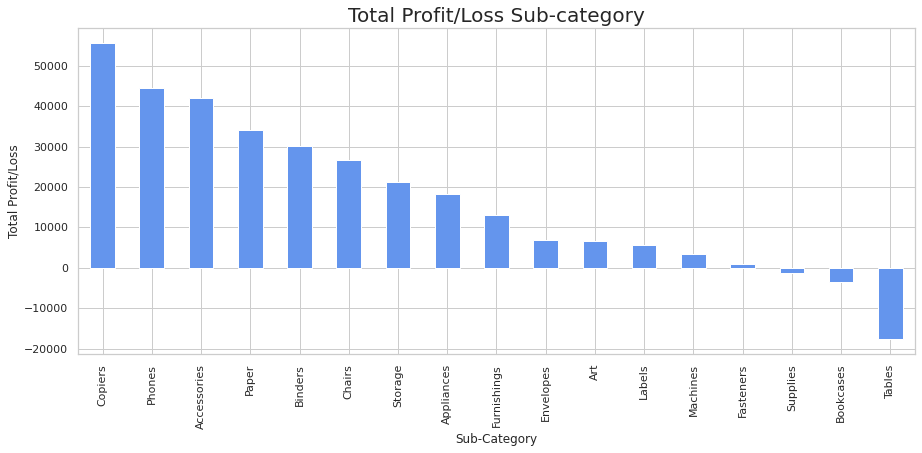

In [ ]:
subcategory_profit = df.groupby('sub-category')['profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 6),color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss')
plt.xlabel('Sub-Category')
plt.title('Total Profit/Loss Sub-category', fontsize = 20)
plt.show()

> - Mesin fotokopi menghasilkan keuntungan paling banyak, diikuti oleh phones, aksesoris, kertas dan binder. Sehingga, strategi pemasaran harus fokus pada pemasaran produk-produk ini.
- Selanjutnya produk seperti mesin, fasteners, supplies, rak buku, dan meja membuat margin kerugian mendekati nol. Ini adalah produk yang superstore dapat pertimbangkan, terlebih untuk produk seperti supplies dan fasteners yang juga memiliki penjualan rendah. Tim harus mempertimbangkan apakah perlu dikeluarkan dari katalog produk atau tingkatkan harga jualnya untuk memperoleh margin keuntungan, bisa juga tawar-menawar dengan harga yang lebih rendah dari pemasok.

## Analisis berdasarkan wilayah

### Net profit margin berdasarkan state

> Net profit margin adalah rasio yang membandingkan keuntungan perusahaan dengan jumlah total uang yang dihasilkannya. Ini digunakan untuk mengukur seberapa efektif perusahaan beroperasi.

In [ ]:
#plotting profit v/s sales statewise
pts = pd.DataFrame(df.groupby('state').sum()[['sales','profit']])
pts['profit to sales'] = pts['profit']/pts['sales']
pts.sort_values(by='profit to sales',inplace = True, ascending = False)
print("Highest 10 Ratios :\n")
print(pts[:10])
print('='*80)
print("Lowest 10 Ratios:\n")
print(pts[-10:])

Highest 10 Ratios :

                          sales      profit  profit to sales
state                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              76269.614  24463.1876         0.320746
Lowest 10 Ratios:

                      sales      profit  profit to sales
state                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17431.1500  -1190.4705        -0.068296


> State District of Columbia memiliki rasio laba tertinggi sebesar 37% dan state Ohio memiliki rasio laba paling rendah.



### 10 states dengan kuantitas item produk terjual paling banyak dan paling sedikit

In [ ]:
state_quantity = pd.DataFrame(df.groupby('state').count()['quantity']).sort_values(by ='quantity',ascending= False)
print('States with maximum number of item sold:\n',state_quantity[:10])
print('\n','='*50, '\n')
print('States with minimum number of item sold:\n',state_quantity[-10:])

States with maximum number of item sold:
                 quantity
state                   
California          2001
New York            1128
Texas                985
Pennsylvania         587
Washington           506
Illinois             492
Ohio                 469
Florida              383
Michigan             255
North Carolina       249


States with minimum number of item sold:
                       quantity
state                         
Kansas                      24
Idaho                       21
Montana                     15
South Dakota                12
Vermont                     11
District of Columbia        10
Maine                        8
North Dakota                 7
West Virginia                4
Wyoming                      1


>- Negara California merupakan negara dengan kuantitas penjualan produk yang paling tinggi yaitu sebanyak 2001 item dan posisi kedua ada negara New York sebanyak 1128 item. 
- Negara North Dakota, West Virginia dan Wyoming yang produknya paling sedikit terjual. Sehingga jika ingin membangun superstore lagi disini, perusahaan harus memikirkan stategi pemasaran untuk area ini, karena item produk yang terjual kurang dari 50 item.







### 10 States dengan penjualan produk tertinggi dan terendah

In [ ]:
state_sales = pd.DataFrame(df.groupby('state').sum()['sales']).sort_values(by ='sales',ascending= False)
print('States with maximum amount of sales:\n',state_sales[:10])
print('\n','='*50, '\n')
print('States with minimum amount of sales:\n',state_sales[-10:])

States with maximum amount of sales:
                     sales
state                    
California    457687.6315
New York      310876.2710
Texas         170188.0458
Washington    138641.2700
Pennsylvania  116511.9140
Florida        89473.7080
Illinois       80166.1010
Ohio           78258.1360
Michigan       76269.6140
Virginia       70636.7200


States with minimum amount of sales:
                          sales
state                         
New Mexico            4783.522
Iowa                  4579.760
Idaho                 4382.486
Kansas                2914.310
District of Columbia  2865.020
Wyoming               1603.136
South Dakota          1315.560
Maine                 1270.530
West Virginia         1209.824
North Dakota           919.910


> - Negara California merupakan negara dengan penjualan produk tertinggi sebesar `$457687.6315` dan New York berada pada urutan kedua dengan besar `$310876.2710`. Artinya, jumlah pelanggan terbesar berasal dari negara California dan New York. 
- Selanjutnya Negara West Virginia dan North Dakota penjualan produknya paling rendah. Sehingga perusahaan perlu lebih fokus pada 10 negara bagian yang memiliki jumlah penjualan paling sedikit karena total penjualannya kurang dari `$50K`.


### Rata-rata pemberian discount pada setiap state

In [ ]:
state_discount = pd.DataFrame(df.groupby('state').mean()['discount']).sort_values(by ='discount',ascending= False)
print('States with average amount of discount:\n',state_discount[:10])

States with average amount of discount:
                 discount
state                   
Illinois        0.390041
Texas           0.370193
Pennsylvania    0.328620
Ohio            0.324947
Colorado        0.316484
Arizona         0.303571
Florida         0.299347
Tennessee       0.291257
Oregon          0.288710
North Carolina  0.283534


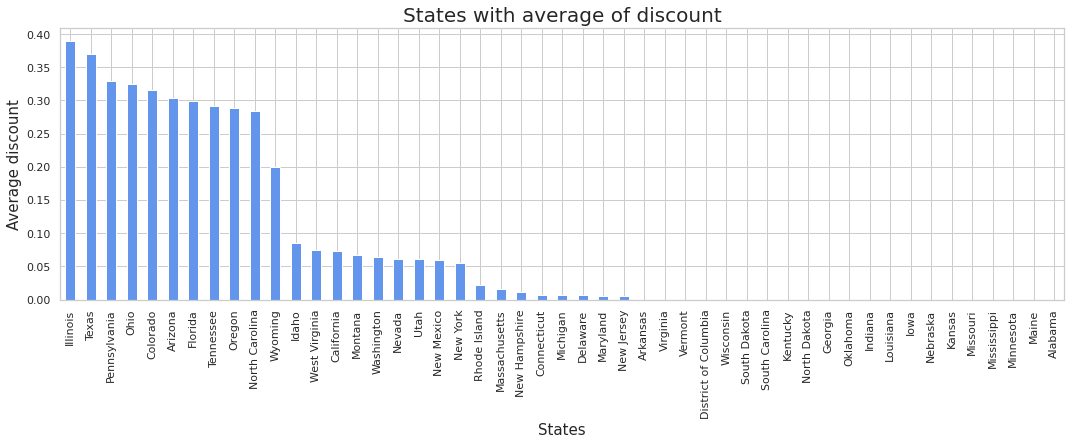

In [ ]:
#visualisasi
state_discount = df.groupby('state')['discount'].mean().sort_values(ascending = False).plot.bar(figsize = (18, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average discount',fontsize = 15)
plt.xlabel('States',fontsize = 15)
plt.title('States with average of discount', fontsize = 20)
plt.show()

> - Negara Illinois, Texas dan Pennsylvania yaitu tiga negara teratas yang memberikan paling banyak diskon pada penjualan produk. 
- Mayoritas negara bagian memberikan diskon dibawah 10%.

**Hubungan diskon dan profit**

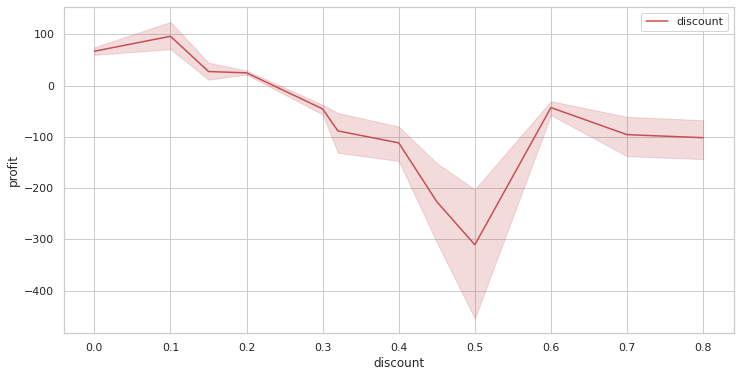

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot('discount', 'profit', data = df, color = 'r', label= 'discount')
plt.legend()

> - Superstore dapat memperoleh keuntungan ketika tingkat diskon yang ditawarkan lebih rendah dari 10%. Diskon yang kecil menyebabkan penurunan harga setelah pemotongan diskon menjadi tidak terlalu besar sehingga margin keuntungan dan keuntungan yang diperoleh lebih maksimal.
- Kerugian dapat terjadi jika besaran diskon di atas 20%. Ini berarti diskon antara 0% sampai 20%, keuntungan diperoleh dari mengurangi terjadinya penurunan harga setelah pemotongan diskon.
- Kerugian terburuk terjadi ketika diskon mendekati 50%. Ini biasa terjadi pada kegiatan festival, penjualan akhir musim, dan penjualan barang-barang gudang.

### Region dengan profit paling tinggi

In [ ]:
region_profit = pd.DataFrame(df.groupby('region').sum()[['profit','sales']]).sort_values(by ='profit',ascending= False)
region_profit

,profit,sales
region,,
West,108418.4489,725457.8245
East,91522.7800,678781.2400
South,46749.4303,391721.9050
Central,39706.3625,501239.8908




> - Keuntungan dan penjualan maksimum berada pada region west dan east.
- Keuntungan minimum berada pada region central.
- Penjualan minimum berada pada region south.



### 10 States dengan profit paling maksimal dan minimum

In [ ]:
state_profit = pd.DataFrame(df.groupby('state').sum()['profit']).sort_values(by ='profit',ascending= False)
print('States with maximum amount of profit:\n',state_profit[:10])
print('\n','='*50, '\n')
print('States with minimum amount of sales:\n',state_profit[-10:])

States with maximum amount of profit:
                 profit
state                 
California  76381.3871
New York    74038.5486
Washington  33402.6517
Michigan    24463.1876
Virginia    18597.9504
Indiana     18382.9363
Georgia     16250.0433
Kentucky    11199.6966
Minnesota   10823.1874
Delaware     9977.3748


States with minimum amount of sales:
                     profit
state                     
Oregon          -1190.4705
Florida         -3399.3017
Arizona         -3427.9246
Tennessee       -5341.6936
Colorado        -6527.8579
North Carolina  -7490.9122
Illinois       -12607.8870
Pennsylvania   -15559.9603
Ohio           -16971.3766
Texas          -25729.3563


> - Negara California dan New York merupakan negara dengan penjualan produk yang menghasilkan profit paling tinggi sekitar `$75K`.
- Negara Pennsylvania, Ohio dan Texas merupakan urutan tiga negara dengan profit paling rendah.
- Negara Texas dari segi penjualan dan kuantitas berada pada urutan ketiga tertinggi, namun jika dilihat dari total profit yang diperoleh, negara Texas mengalami kerugian sebesar `$25K`. Ini dapat disebabkan oleh besarnya diskon yang diberikan oleh negara Texas dimana Texas berada pada urutan kedua tertinggi. Sehingga perusahaan disarankan untuk mengurangi diskon pada negara Texas dan menggantinya dengan stategi bisnis lain, agar dapat mengurangi kerugian.
- Negara California memberikan diskon dibawah 10%, hal ini yang mungkin menyebabkan negara tersebut memiliki penjualan dan profit tertinggi. Itu berarti bahwa besaran diskon tersebut sudah cukup efektif untuk negara California.
- Selain itu, beberapa negara bagian lainnya yang memiliki kerugian juga berada pada rata-rata diskon yang cukup tinggi. Sehingga pemberian diskon di negara yang merugi perlu dipertimbangkan kembali.
- Sehingga, dari hal tersebut perusahaan harus fokus pada negara bagian yang merugi dan tim harus menganalisis penggunaan sumber daya mereka serta kategori yang dijual di negara bagian tersebut.



### List produk yang paling banyak dibeli oleh 3 negara bagian yang menghasilkan profit maksimal

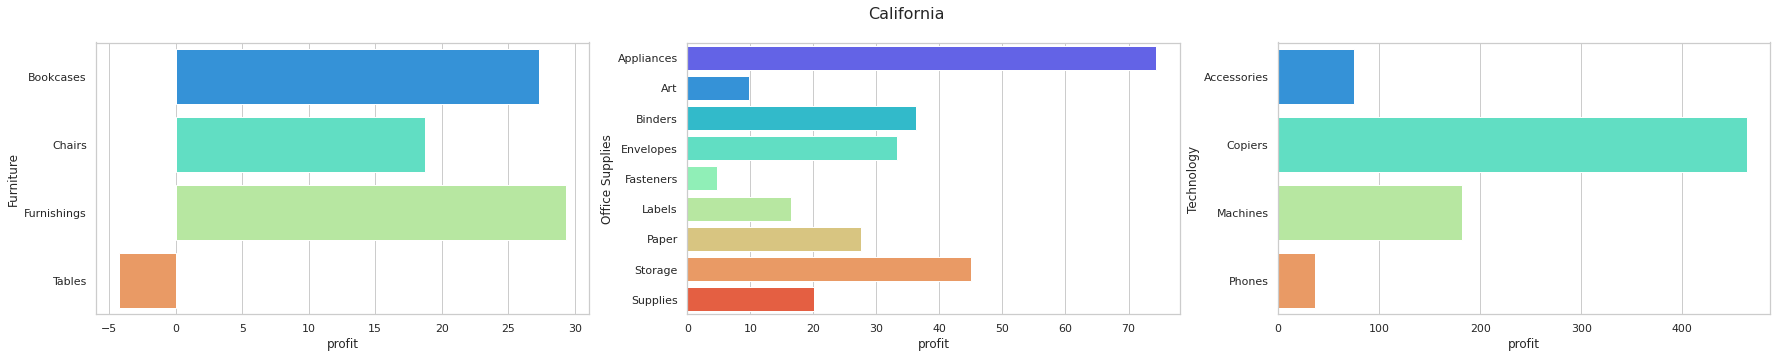

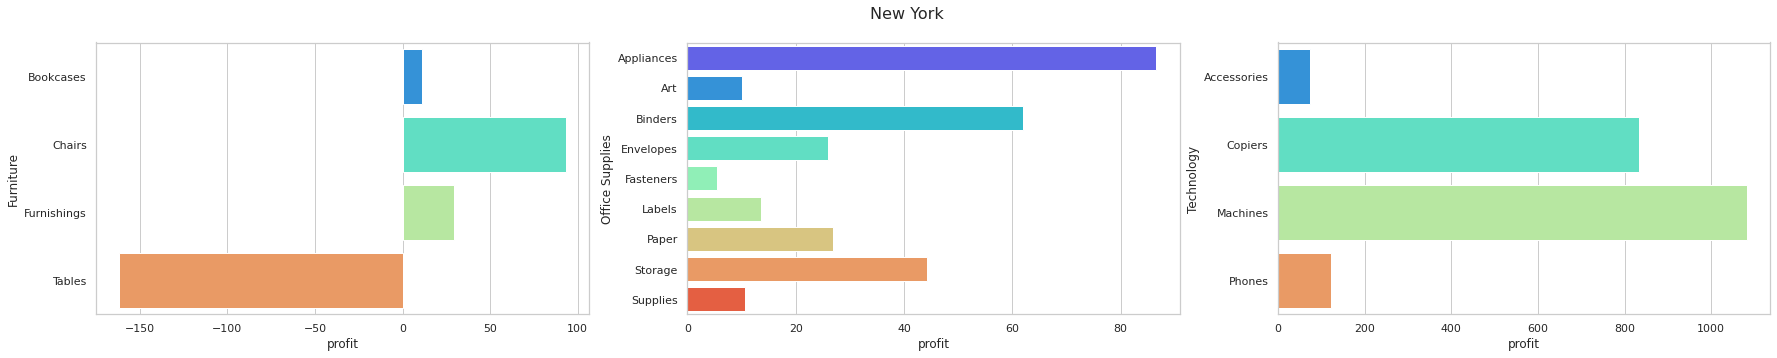

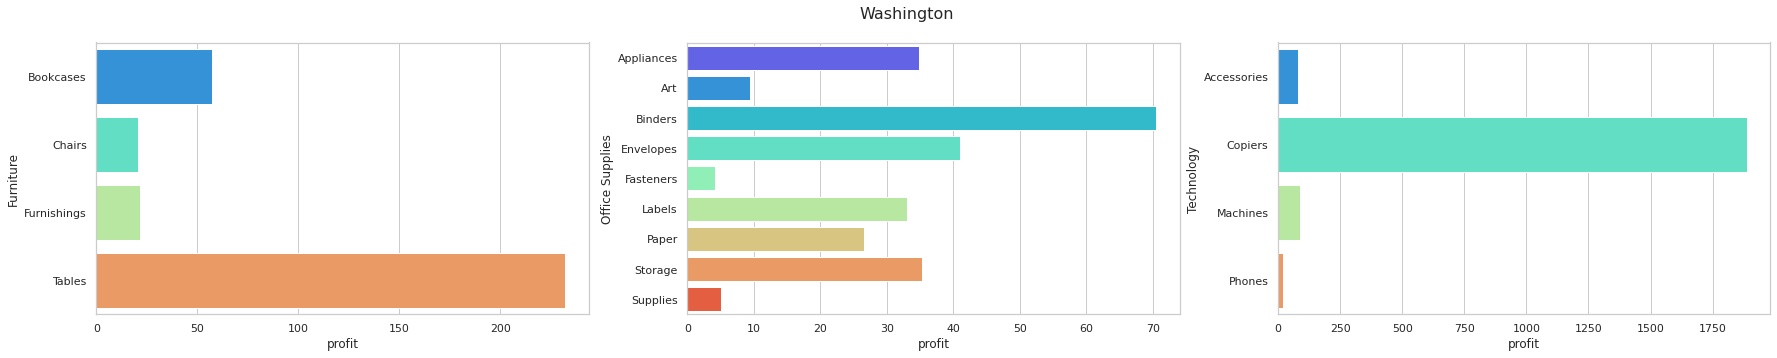

In [ ]:
def state_max_profit(states):
# plot profit dengan kategori dan sub-kategori dari state
    state_prof_max = df.groupby(['state'])
    for state in states:
        data_state = state_prof_max.get_group(state).groupby(['category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot tiap kategori
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot tiap sub-kategori
            category_list = data_state.get_group(category).groupby(['sub-category']).mean()
            sns.barplot(x = category_list.profit, y = category_list.index, 
                        ax = ax[ax_index], palette = 'rainbow')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# pilih negara yang ingin ditampilkan
states = ['California','New York','Washington']
state_max_profit(states)

> - Pada negara dengan profit tertinggi yaitu California dan New York semua produk pada kategori dan sub-kategori menghasilkan keuntungan yang cukup baik. Terutama pada kategori teknologi yang menghasilkan keuntungan sangat besar. Sayangnya, produk meja pada kategori furniture mengakibatkan kerugian yang cukup besar. Sehingga perusahaan dapat mempertimbangkan untuk pemberian diskon pada produk meja. 
- Untuk negara Washington yang memiliki profit menengah, semua produk pada kategori dan sub-kategori menghasilkan keuntungan yang cukup baik. Terutama pada produk mesin fotokopi dan meja yang menghasilkan profit cukup besar. 
- Kategori office supplies menghasilkan keuntungan yang kecil karena harga produknya yang terbilang cukup murah.

### List produk yang paling banyak dibeli oleh 2 negara bagian yang menanggung kerugian

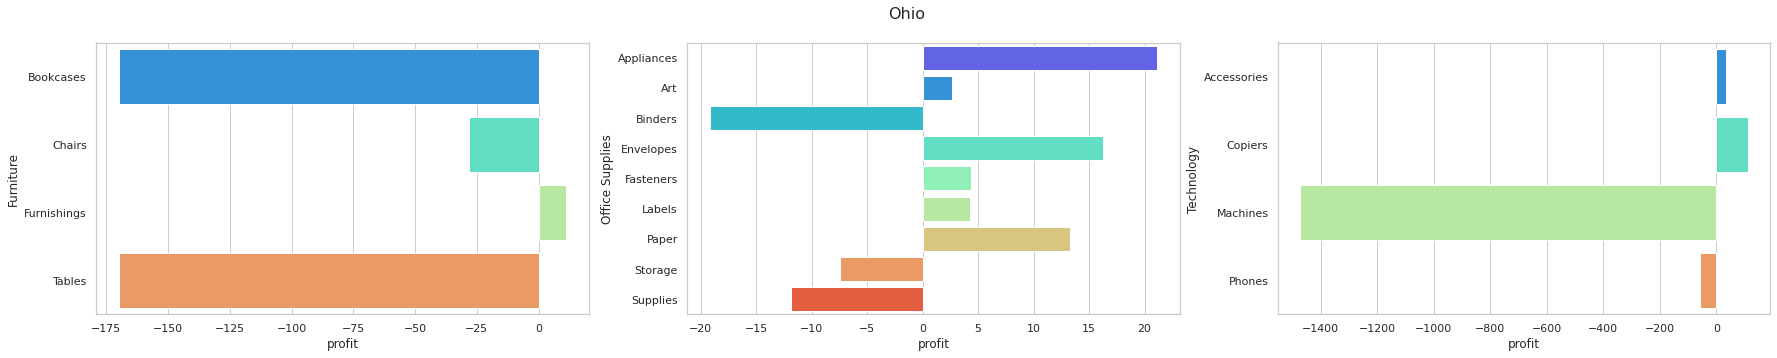

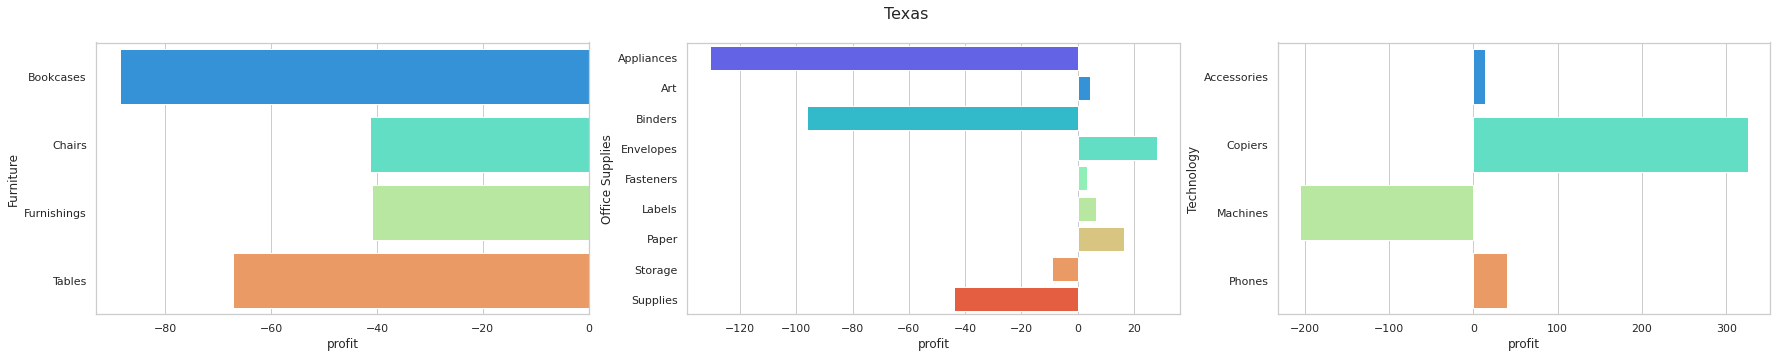

In [ ]:
def state_max_profit(states):
# plot profit dengan kategori dan sub-kategori dari state
    state_prof_max = df.groupby(['state'])
    for state in states:
        data_state = state_prof_max.get_group(state).groupby(['category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot tiap kategori
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot tiap sub-kategori
            category_list = data_state.get_group(category).groupby(['sub-category']).mean()
            sns.barplot(x = category_list.profit, y = category_list.index, 
                        ax = ax[ax_index], palette = 'rainbow')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# pilih negara yang ingin ditampilkan
states = ['Ohio','Texas']
state_max_profit(states)

> - Untuk negara Ohio dan Texas yang memiliki profit paling rendah, kategori furniture dan teknologi merupakan kategori yang paling banyak mengalami kerugian. Terutama kategori furniture dimana sepenuhnya merugi. Sehingga perlunya perusahaan mempertimbangkan beberapa produk dari kategori ini untuk dijual. 
- Produk seperti art, envelopes, fasteners, labels, paper, accessoris, mesin fotokopi dan phones masih cukup menguntungkan untuk dijual.
- Sehingga perusahaan dapat mempertimbangkan untuk penyediaan produk dari kategori office suppplies. Selain itu, produk mesin fotokopi pada kedua negara ini ternyata cukup dibutuhkan, dilihat dari profit yang dihasilkan. Oleh karenanya, perusahaan dapat mempertimbangkan stategi pemasaran yang baru untuk mesin fotokopi agar dapat meningkatkan profit yang dihasilkan.

## Analisis berdasarkan segment

### Segmen pelanggan yang perlu dipertahankan untuk mendorong keuntungan lebih tinggi

In [ ]:
df_segment = pd.DataFrame(df.groupby(['segment'])[['profit','sales']].sum()).sort_values("profit", ascending=False)
df_segment

,profit,sales
segment,,
Consumer,134119.2092,1.161401e+06
Corporate,91979.1340,7.061464e+05
Home Office,60298.6785,4.296531e+05


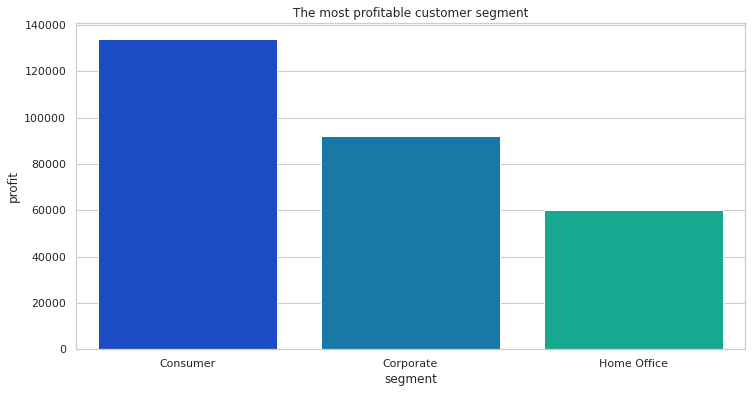

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df_segment, x = df_segment.index, y = df_segment.profit, palette = "winter")
plt.title("The most profitable customer segment")
plt.show()

> Segment konsumer merupakan segment yang memberikan penjualan dan profit paling maksimum dan segment home office yang memberikan penjualan dan profit paling minimum. Sehingga stategi marketing dapat memfokuskan untuk mempertahankan pelanggan dari bagian segment konsumer dan corporate atau memperbaiki stategi pemasaran pada segment home office.

### Ship Mode yang paling disukai oleh pelanggan

Text(0.5, 1.0, 'The most used ship mode')

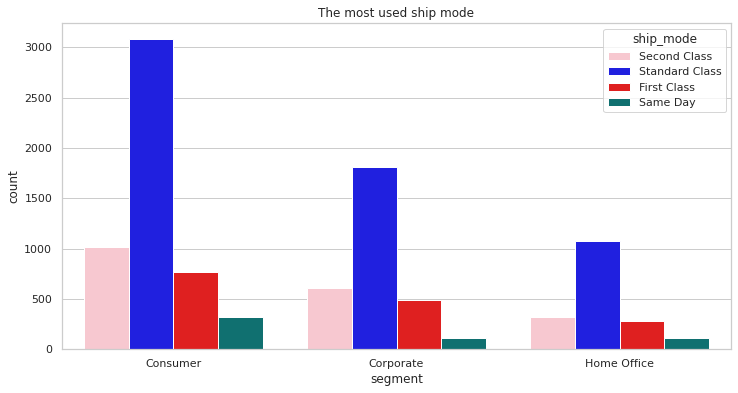

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='segment' ,hue = 'ship_mode', data =df,palette=['pink','blue','red','teal'])
plt.title("The most used ship mode")

> Dalam hal ini, standard class merupakan jenis pengiriman yang paling disukai oleh pelanggan dibandingkan jenis pengiriman yang lain. Berdasarkan segment konsumen, standard class juga yang paling banyak disukai oleh pelanggan. Hal ini kemungkinan karena standard class memiliki biaya yang murah dan paling dikenal oleh pelanggan.

# Finding

> - Produk-produk yang menyebabkan kerugian sebaiknya dipertimbangkan untuk dikeluarkan dari penjualan, seperti mesin Cubify CubeX 3D Printer Triple Head Print, Lexmark MX611dhe Monochrome Laser Printer, Cubify CubeX 3D Printer Double Head Print dan produk lainnya. 
- Perusahaan dapat berfokus pada kategori teknologi atau sub-kategori produk yang menghasilkan profit maksimal seperti phones, kursi, storage, tables dan binders. Produk-produk tersebut dapat digabungkan dengan produk yang kurang menguntungkan seperti meja dan rak buku. 
- Untuk produk-produk yang membuat margin keuntungan menuju nol, perusahaan dapat melakukan peningkatkan harga jual produk untuk memperoleh margin keuntungan atau tawar-menawar dengan harga yang lebih rendah dari pemasok.
- Penjualan meja pada negara bagian California dan New York harus diminimalkan karena mengakibatkan kerugian.
- Kategori furniture dan teknologi harus diminimalkan pada negara bagian Ohio dan Texas karena mengakibatkan kerugian fatal.
- Keuntungan maksimal dapat terlihat dari penjualan di negara California dan New York.
- Central region menghadapi kerugian penjualan dibandingkan wilayah lain.
- Jumlah barang terjual paling banyak berasal dari kategori Papers dan Binders.
- Keuntungan maksimal apabila diskon berada pada rentang 0% sampai 10%.
- Ketika diskon mencapai 50% maka akan diperoleh keuntungan minimum.
- Beberapa negara bagian yang mengalami kerugian ternyata berada pada rata-rata diskon yang cukup tinggi. Sehingga pemberian diskon di negara yang merugi perlu dipertimbangkan kembali.
- Segment konsumer dan segment corporate merupakan segment yang memberikan penjualan dan profit cukup besar. Sehingga stategi marketing dapat memfokuskan untuk mempertahankan pelanggan dari bagian segment konsumer dan corporate atau memperbaiki stategi pemasaran pada segment home office.
- Standard class adalah jenis pengiriman yang paling disukai oleh pelanggan dibandingkan jenis pengiriman yang lain